<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/Copy_of_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.regularizers import l2

In [3]:
trdata = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True)
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data-liverd/train",target_size=(224,224),class_mode='categorical')
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data-liverd/val", target_size=(224,224),class_mode='categorical')

Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [4]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet',include_top=True)

553467904/553467096 [==============================] - 5s 0us/step


In [5]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
#execute this cell 3 times
vggmodel.layers.pop()

In [7]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [8]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras import regularizers
X= vggmodel.layers[-1].output
#fc_1=Dense(4096,activation='relu')(X)
dr_1=Dropout(0.3)(X)
dr_2=Dropout(0.8)(dr_1)
'''fc_2=Dense(1024,activation='relu',kernel_regularizer=l2(0.01))(dr_1)
dr_2=Dropout(0.5)(fc_2)
fc_3=Dense(1024,activation='relu',kernel_regularizer=l2(0.01))(dr_2)
dr_3=Dropout(0.3)(fc_3)
fc_4=Dense(2048,activation='relu',kernel_regularizer=l2(0.01))(dr_3)
dr_4=Dropout(0.5)(fc_4)
fc_5=Dense(4096,activation='relu',kernel_regularizer=l2(0.01))(fc_4)
fc_6=Dense(4096,activation='relu',kernel_regularizer=l2(0.01))(fc_5)
fc_7=Dense(4096,activation='relu',kernel_regularizer=l2(0.01))(fc_6)
fc_8=Dense(4096,activation='relu',kernel_regularizer=l2(0.01))(fc_7)'''
predictions = Dense(4, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [10]:
model_final.load_weights('/content/drive/My Drive/Best models/model_a_1.h5')

In [12]:
model_final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model_final.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(testdata.classes, y_pred, target_names=target_names))

In [14]:
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.001), metrics=["accuracy"])

In [15]:
model_final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Best models/model_x_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
hist=model_final.fit_generator(traindata, steps_per_epoch=4,epochs= 20, validation_data= testdata,validation_steps=1, callbacks=[checkpoint,early])

Epoch 1/20
4/4 [==============================] - 88s 22s/step - loss: 1.2700 - accuracy: 0.4141 - val_loss: 1.0385 - val_accuracy: 0.5625

Epoch 00001: val_accuracy improved from -inf to 0.56250, saving model to /content/drive/My Drive/Best models/model_x_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/20
4/4 [==============================] - 86s 21s/step - loss: 0.8367 - accuracy: 0.6797 - val_loss: 0.6978 - val_accuracy: 0.7500

Epoch 00002: val_accuracy improved from 0.56250 to 0.75000, saving model to /content/drive/My Drive/Best models/model_x_1.h5
Epoch 3/20
4/4 [==============================] - 86s 21s/step - loss: 0.8054 - accuracy: 0.6719 - val_loss: 0.6829 - val_accuracy: 0.7500

Epoch 00003: val_accuracy did not improve from 0.75000
Epoch 4/20
4/4 [==============================] - 83s 21s/step - loss: 0.8554 - accuracy: 0.6406 - val_loss: 0.5547 - val_accuracy: 0.8750

Epoch 00004: val_accuracy improved from 0.75000 to 0.87500, saving model to /content/drive/My Drive/Best models/model_x_1.h5
Epoch 5/20
4/4 [==============================] - 84s 21s/step - loss: 0.6782 - accuracy: 0.7266 - val_loss: 0.6222 - val_accuracy: 0.9062

Epoch 00005: val_accuracy improved from 0.87500 to 0.90625, saving model to /content/drive/My Drive/Best models/model_x_1.h5
Epoch 6/20

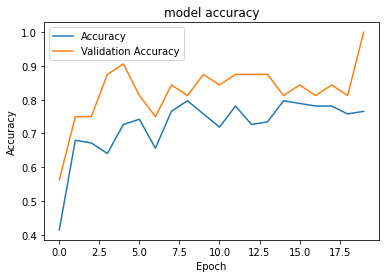

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
 
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

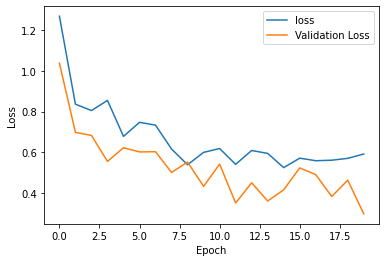

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [19]:
model_final.save("/content/drive/My Drive/Best models/model1_1.h5")

In [12]:
model_cnn=keras.models.load_model("/content/drive/My Drive/Best models/model_x_1.h5")

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model_cnn.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(testdata.classes, y_pred, target_names=target_names))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [ ]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data-liverd/val',
                                                        target_size=(224, 224))

In [ ]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_cnn.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['grade1', 'grade0', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred))

In [13]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data-liverd/val'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_cnn.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 40 WrongCount 10
grade0
correct Count 45 WrongCount 5
grade2
correct Count 49 WrongCount 1
grade3
correct Count 40 WrongCount 10


In [14]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 
 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[45  5  0  0]
 [ 1 40  3  6]
 [ 0  1 49  0]
 [ 0  9  1 40]]
Accuracy Score : 0.87
Report : 
              precision    recall  f1-score   support

      grade0       0.98      0.90      0.94        50
      grade1       0.73      0.80      0.76        50
      grade2       0.92      0.98      0.95        50
      grade3       0.87      0.80      0.83        50

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [20]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data-liverd/val'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 35 WrongCount 15
grade0
correct Count 42 WrongCount 8
grade2
correct Count 48 WrongCount 2
grade3
correct Count 46 WrongCount 4


In [21]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[42  8  0  0]
 [ 1 35  4 10]
 [ 0  2 48  0]
 [ 0  3  1 46]]
Accuracy Score : 0.855
Report : 
              precision    recall  f1-score   support

      grade0       0.98      0.84      0.90        50
      grade1       0.73      0.70      0.71        50
      grade2       0.91      0.96      0.93        50
      grade3       0.82      0.92      0.87        50

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



In [ ]:
tr_loss,tr_acc=model_cnn.evaluate(testdata)
tr_acc

In [ ]:
tr_loss,tr_acc=model_final.evaluate(traindata)
tr_acc

In [ ]:
tr_loss,tr_acc=model_final.evaluate(testdata)
tr_acc

In [ ]:
saved_model=keras.models.load_model("/content/drive/My Drive/Best models/model_n_1.h5")

In [ ]:
tr_loss,tr_acc=saved_model.evaluate(validation_generator)
tr_acc

In [ ]:
tr_loss,tr_acc=saved_model.evaluate(testdata)
tr_acc

In [ ]:
model_final=keras.models.load_model("/content/drive/My Drive/Best models/model_f_1.h5")